In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Read the data from the csv file
df = pd.read_csv("Assignment_RISK_data.csv", index_col="Time")
df

,A1,A2,A3
Time,,,
1,0.150001,-0.005278,0.023806
2,-0.065967,-0.016427,-0.001935
3,-0.013223,0.009672,0.006253
4,0.024609,0.020163,0.013015
5,0.146034,0.021604,0.002158
...,...,...,...
1997,-0.006817,0.015698,-0.005128
1998,0.123604,-0.003090,0.014658
1999,-0.045066,-0.010671,0.000240


## What are the pairwise correlations of the three series? 

There is a very weak positive correlation between A1 and A2. They tend to move together slightly, but the relationship is not strong. 

A1 and A3 have almost no correlation, they move independently of each other.

There is a very weak negative correlation between A2 and A3. They tend to move slightly in opposite directions. 

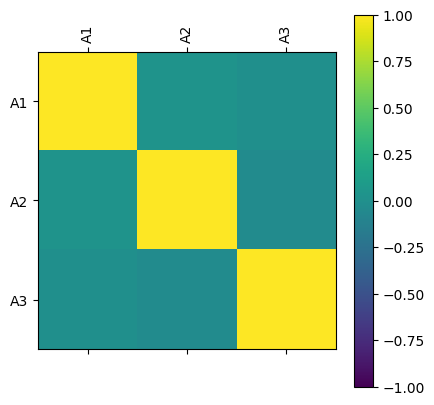

          A1        A2        A3
A1  1.000000  0.026093 -0.005420
A2  0.026093  1.000000 -0.032009
A3 -0.005420 -0.032009  1.000000


In [12]:
# Compute the pairwise correlations of the columns
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

# Print the correlation matrix
print(correlation_matrix)

## Which series has the “best” performance?

On the basis of absolute returns, A2 has the best performance (101.2783% return).

In [15]:
# Compute the absolute/total return of the columns
# Using cumprod (cumulative product)
total_return = (1 + df).cumprod().iloc[-1] - 1  # Directly use df since it contains returns

print(total_return)

A1   -0.964741
A2    1.012783
A3    0.803146
Name: 2001, dtype: float64


## What is the performance of the combination of the three series if their daily returns are combined equally?

Total return of the equal weighted portfolio:  197%

/tmp/ipykernel_114032/3004795734.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.33336666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio_value_equal_rebalanced.iloc[i, :-1] = current_portfolio  # Assign to ETF columns (excluding "Total")
/tmp/ipykernel_114032/3004795734.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.15739148239149' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio_value_equal_rebalanced.iloc[i, :-1] = current_portfolio  # Assign to ETF columns (excluding "Total")
/tmp/ipykernel_114032/3004795734.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.1268831191199' has dtype incompatible with int64, pl

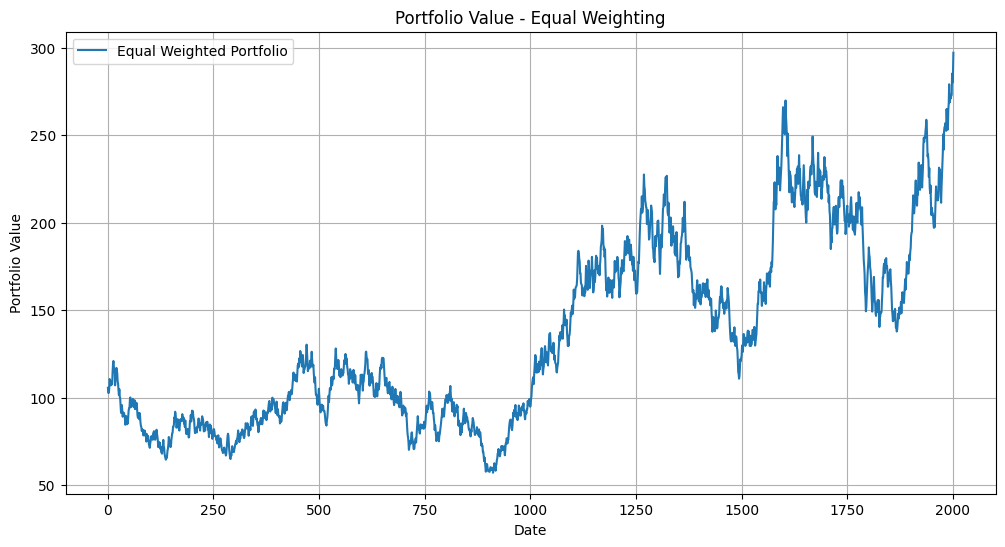

            A1        A2        A3
Time                              
1     0.150001 -0.005278  0.023806
2    -0.065967 -0.016427 -0.001935
3    -0.013223  0.009672  0.006253
4     0.024609  0.020163  0.013015
5     0.146034  0.021604  0.002158
              A1         A2         A3       Total
Time                                              
1      38.333367  33.157391  34.126883  105.617641
2      32.883468  34.627555  35.137760  102.648783
3      33.763821  34.547205  34.430208  102.741233
4      35.089852  34.937597  34.692820  104.720269
5      40.004341  35.660899  34.982083  110.647323
...          ...        ...        ...         ...
1997   90.283380  92.330084  90.436894  273.050358
1998  102.266840  90.735588  92.350896  285.353324
1999   90.831183  94.102790  95.140603  280.074576
2000   98.673519  94.435764  91.791167  284.900450
2001  107.079969  95.933157  94.253792  297.266918

[2001 rows x 4 columns]
Total return of the equal weighted portfolio:  1.9726691751350791


In [20]:
initial_investment = 100
num_etfs = len(df.columns)

portfolio_value_equal_rebalanced = pd.DataFrame(0, index=df.index, columns=df.columns.append(pd.Index(['Total']))) # Correct Initialization

current_portfolio = np.array([initial_investment / num_etfs] * num_etfs)

for i in range(len(df)):
    returns = (1 + df.iloc[i]).values
    current_portfolio = current_portfolio * returns
    portfolio_value_equal_rebalanced.iloc[i, :-1] = current_portfolio  # Assign to ETF columns (excluding "Total")
    portfolio_value_equal_rebalanced.loc[df.index[i], 'Total'] = sum(current_portfolio)

    total_portfolio_value = portfolio_value_equal_rebalanced['Total'].iloc[i]
    equal_weight_value = total_portfolio_value / num_etfs
    current_portfolio = np.array([equal_weight_value] * num_etfs)

# Plotting Method 1
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_equal_rebalanced.index, portfolio_value_equal_rebalanced["Total"], label="Equal Weighted Portfolio")
plt.title("Portfolio Value - Equal Weighting")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()

print(df.head())
print(portfolio_value_equal_rebalanced)

print("Total return of the equal weighted portfolio: ", portfolio_value_equal_rebalanced['Total'].iloc[-1] / initial_investment - 1)

## What is Its worst drawdown? (equal weighting)

The worst drawdown is -56%

Max Drawdown:  -0.5621623081435128


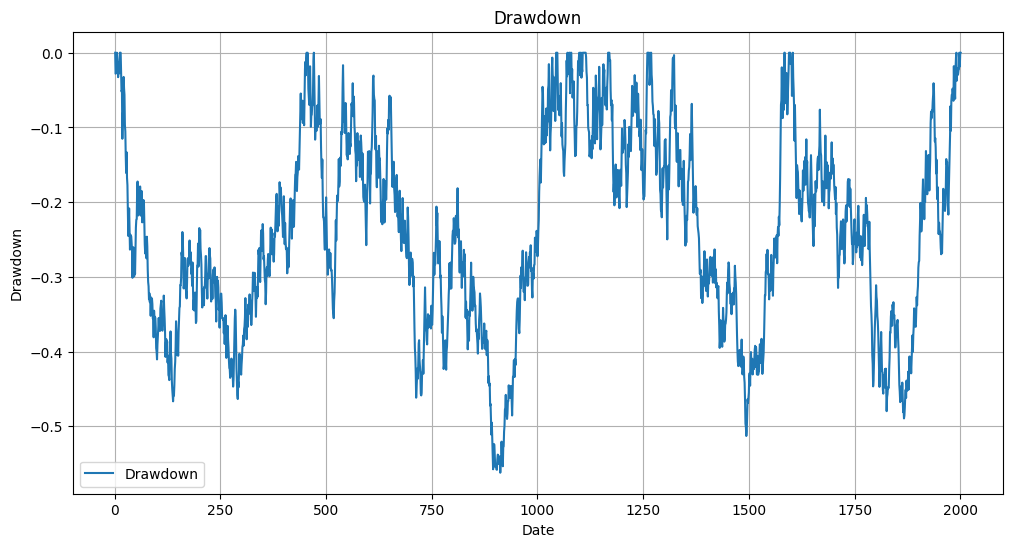

In [25]:
max_value = 0
drawdowns = []
for i in range(len(df)):
    folio_value = portfolio_value_equal_rebalanced['Total'].iloc[i]
    if folio_value > max_value:
        max_value = folio_value
        drawdowns.append(0)
    else :
        drawdown = (max_value - folio_value) / max_value
        drawdowns.append(-drawdown)

print("Max Drawdown: ", min(drawdowns))

# Plot the drawdowns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_equal_rebalanced.index, drawdowns, label="Drawdown")
plt.title("Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)
plt.show()

## What is the performance of the combination of the three if their returns are combined in proportions that are inverse to their 20 day trailing volatility?

The total return of the inverse volatility weighted portfolio: 126%

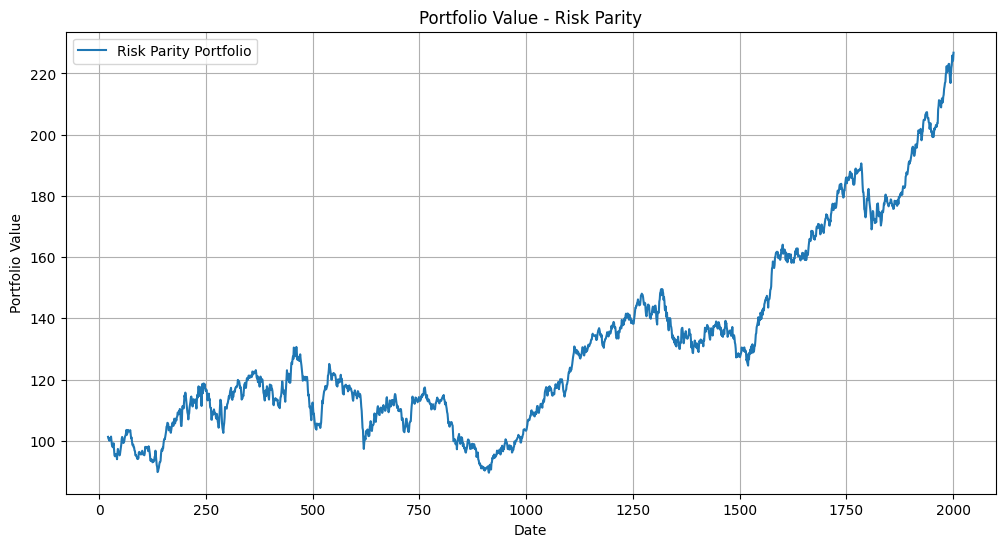

Total return of the risk parity portfolio:  1.2675137487448551


In [27]:
# Method 2: Risk Parity (Inverse Volatility)
lookback_period = 20

volatility = df.rolling(window=lookback_period).std()
inverse_volatility = 1 / volatility
inverse_volatility = inverse_volatility.fillna(0)
inverse_volatility = inverse_volatility.replace([np.inf, -np.inf], 0)
weights = inverse_volatility.div(inverse_volatility.sum(axis=1), axis=0)

portfolio_value_risk_parity = pd.DataFrame(index=df.index, columns=df.columns.append(pd.Index(['Total'])))

current_portfolio = initial_investment * weights.iloc[lookback_period-1] #initial allocation

for i in range(lookback_period, len(df)):
    returns = df.iloc[i].values
    current_portfolio = current_portfolio * (1 + returns)
    portfolio_value_risk_parity.iloc[i, :-1] = current_portfolio
    portfolio_value_risk_parity.loc[df.index[i], 'Total'] = sum(current_portfolio)

    # Use weights from the PREVIOUS day for rebalancing
    lagged_weights = weights.iloc[i-1] #weights computed for the previous day
    current_portfolio = (portfolio_value_risk_parity['Total'].iloc[i] * lagged_weights).values #rebalance based on previous day weights

    
# Plotting Method 2
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_risk_parity.index, portfolio_value_risk_parity["Total"], label="Risk Parity Portfolio")
plt.title("Portfolio Value - Risk Parity")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()

print("Total return of the risk parity portfolio: ", portfolio_value_risk_parity['Total'].iloc[-1] / initial_investment - 1)

## What is Its worst drawdown? (risk parity)

The worst drawdown of the risk parity portfolio is -31%

Max Drawdown:  -0.3144025437207114


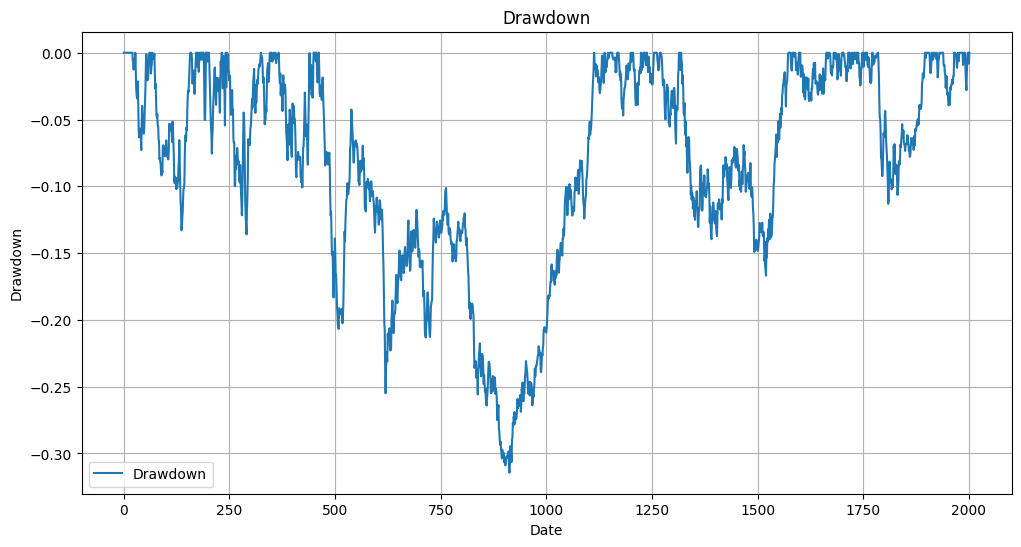

In [29]:
max_value = 0
drawdowns = []
for i in range(len(df)):
    if i < lookback_period:
        drawdowns.append(0)
        continue
    folio_value = portfolio_value_risk_parity['Total'].iloc[i]
    if folio_value > max_value:
        max_value = folio_value
        drawdowns.append(0)
    else :
        drawdown = (max_value - folio_value) / max_value
        drawdowns.append(-drawdown)

print("Max Drawdown: ", min(drawdowns))

# Plot the drawdowns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_risk_parity.index, drawdowns, label="Drawdown")
plt.title("Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)
plt.show()

## Can you predict A3 based on either A1 or A2 or a combination of the two?

I was able to somewhat predict A3 based on the lagged (one period lag) A2 data using linear regression. The model shows a strongly significant relationship between A2_lag 1 and A3 (p < 0.000), indicating that changes in A2_lag1 are associated with changes in A3. (Note: This is in contrast to our initial correlation caclulcation which showed a weak negative correlation between A2 and A3, however here we are considering A2_lag1 and A3.) Even though we found a significant relationship between A2_lag1 and A3, the models explanatory power is limited, with an R-squared value of 0.174. This suggests that only 17.4% in the variance of A3 is explained by A2_lag1. 

## If so, what is the strategy and its performance?

I tested a simple model that bought A3 whenever the predicted value was positive, and held it until a negative value was predicted. It is a long-only model. The model performs very poorly with a return of -96%. 

In [44]:
import statsmodels.api as sm  # For regression

# better to reset it so it becomes a regular column
df2 = df.copy().reset_index().drop(columns='Time')

df2


,A1,A2,A3
0,0.150001,-0.005278,0.023806
1,-0.065967,-0.016427,-0.001935
2,-0.013223,0.009672,0.006253
3,0.024609,0.020163,0.013015
4,0.146034,0.021604,0.002158
...,...,...,...
1996,-0.006817,0.015698,-0.005128
1997,0.123604,-0.003090,0.014658
1998,-0.045066,-0.010671,0.000240
1999,0.056935,0.011542,-0.016785


In [67]:
# Create lagged features
df['A1_lag1'] = df['A1'].shift(1)  # Shift A1 down by 1 row
df['A2_lag1'] = df['A2'].shift(1)  # Shift A2 down by 1 row

# Drop the first row, as it will have NaN values due to the shift
df = df.dropna()  # Remove rows with NaN values (the first row)

# Separate features and target
features_A1_lag1 = df[['A1_lag1']]
features_A2_lag1 = df[['A2_lag1']]
features_A1_A2_lag1 = df[['A1_lag1', 'A2_lag1']]
target_A3 = df['A3'] # Target variable remains A3, but aligned with lagged features

# Add a constant
features_A1_lag1 = sm.add_constant(features_A1_lag1)
features_A2_lag1 = sm.add_constant(features_A2_lag1)
features_A1_A2_lag1 = sm.add_constant(features_A1_A2_lag1)


In [53]:
# Model 1: Predicting A3 based on A1
model_A1 = sm.OLS(target_A3, features_A1_lag1).fit()

# Model 2: Predicting A3 based on A2
model_A2 = sm.OLS(target_A3, features_A2_lag1).fit()

# Model 3: Predicting A3 based on A1 and A2
model_A1_A2 = sm.OLS(target_A3, features_A1_A2_lag1).fit()

In [54]:
print("Model A3 ~ A1:")
print(model_A1.summary())

Model A3 ~ A1:
                            OLS Regression Results                            
Dep. Variable:                     A3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0006998
Date:                Wed, 12 Feb 2025   Prob (F-statistic):              0.979
Time:                        19:39:48   Log-Likelihood:                 6162.7
No. Observations:                2000   AIC:                        -1.232e+04
Df Residuals:                    1998   BIC:                        -1.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000     

In [55]:
print("\nModel A3 ~ A2:")
print(model_A2.summary())


Model A3 ~ A2:
                            OLS Regression Results                            
Dep. Variable:                     A3   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     419.7
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           8.13e-85
Time:                        19:39:56   Log-Likelihood:                 6353.3
No. Observations:                2000   AIC:                        -1.270e+04
Df Residuals:                    1998   BIC:                        -1.269e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000    

In [56]:
print("\nModel A3 ~ A1 + A2:")
print(model_A1_A2.summary())


Model A3 ~ A1 + A2:
                            OLS Regression Results                            
Dep. Variable:                     A3   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     209.9
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.80e-83
Time:                        19:40:00   Log-Likelihood:                 6353.5
No. Observations:                2000   AIC:                        -1.270e+04
Df Residuals:                    1997   BIC:                        -1.268e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.00

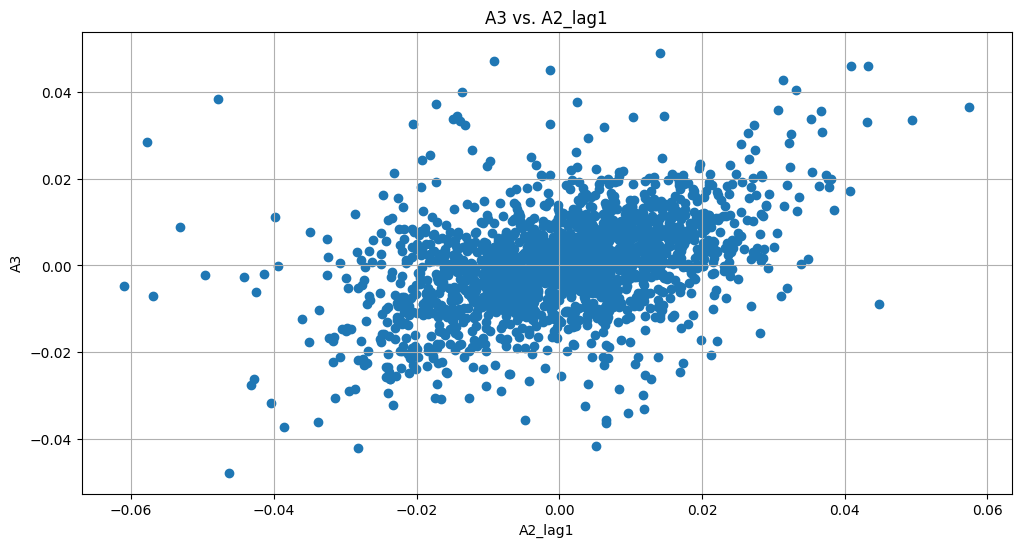

In [57]:
#Create scatter plots of A3 vs. A2_lag1 to visually inspect the relationship
plt.figure(figsize=(12, 6))
plt.scatter(features_A2_lag1['A2_lag1'], target_A3)
plt.title("A3 vs. A2_lag1")
plt.xlabel("A2_lag1")
plt.ylabel("A3")
plt.grid(True)
plt.show()


In [ ]:
# Let's try do the prediction usig A2_lag2

df['A2_lag2'] = df['A2'].shift(2)  # Shift A2 down by 2 rows

# Drop the first row, as it will have NaN values due to the shift
df = df.dropna()  

features_A2_lag2 = df[['A2_lag2']]
target_A3 = df['A3']

# Add a constant
features_A2_lag2 = sm.add_constant(features_A2_lag2)

model_A2_l2 = sm.OLS(target_A3, features_A2_lag2).fit()

print("\nModel A3 ~ A2:")
print(model_A2_l2.summary())



Model A3 ~ A2:
                            OLS Regression Results                            
Dep. Variable:                     A3   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.171
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.279
Time:                        15:36:57   Log-Likelihood:                 6143.2
No. Observations:                1994   AIC:                        -1.228e+04
Df Residuals:                    1992   BIC:                        -1.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000    

/tmp/ipykernel_114032/1553302890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A2_lag2'] = df['A2'].shift(2)  # Shift A2 down by 1 row


Total Return of Trading Strategy: -0.9637322984411639


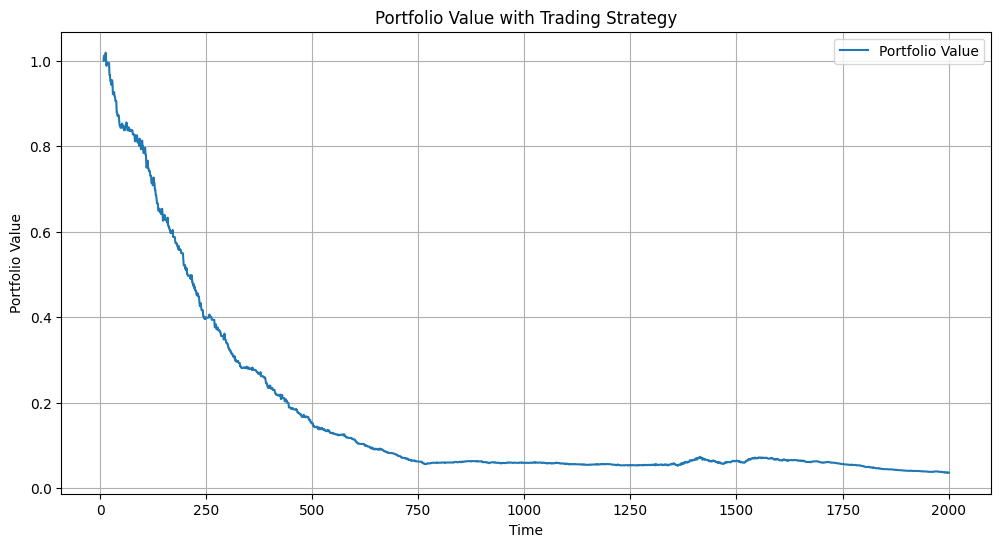

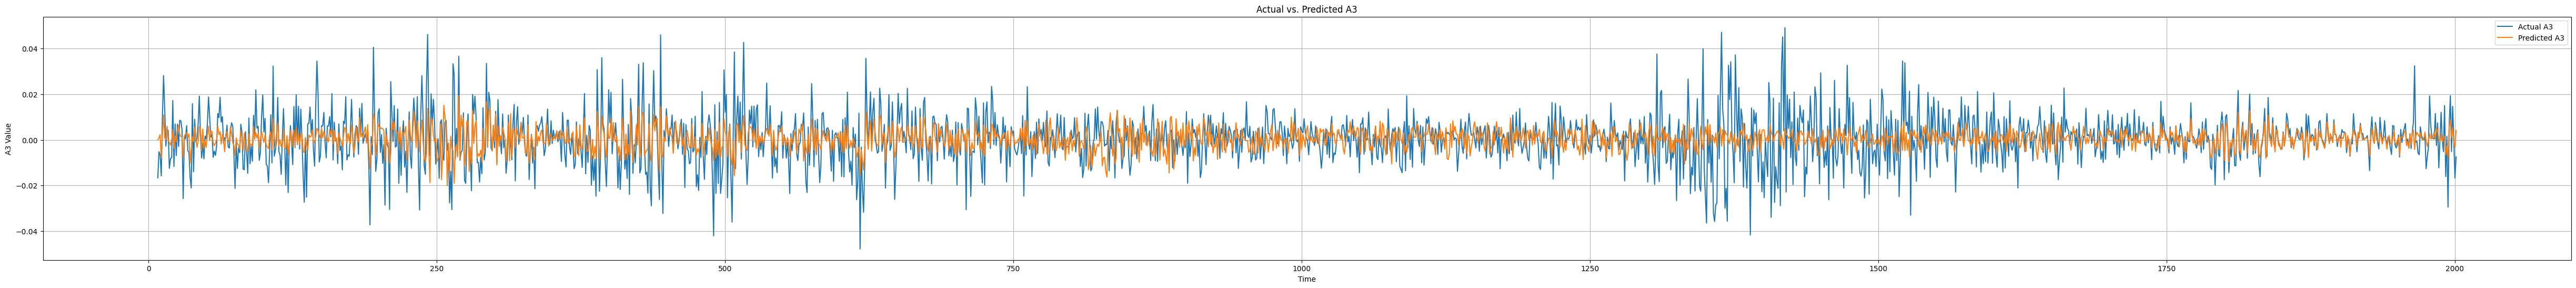

In [64]:
# Make predictions
df['A3_predicted'] = model_A2.predict(features_A2_lag1)

# Trading strategy
holding = False  # Initialize holding status
cash = 1        # Initial cash (you can adjust this)
shares_held = 0  # Number of shares held
portfolio_value = [cash]  # Initialize portfolio value tracking

for i in range(len(df)):
    predicted_A3 = df['A3_predicted'].iloc[i]
    actual_A3 = df['A3'].iloc[i]  # Actual return of A3 for this period

    if predicted_A3 > 0 and not holding:  # Buy signal
        shares_held = cash / (1 + actual_A3)  # Buy as many shares as possible with available cash at current price (normalized to 1)
        cash = 0  # All cash is used to buy shares
        holding = True
    elif predicted_A3 < 0 and holding:  # Sell signal
        cash = shares_held * (1 + actual_A3) # Sell all shares at current price (normalized to 1)
        shares_held = 0
        holding = False

    if holding:  # If holding, update portfolio value with the actual return of A3
        portfolio_value.append(shares_held * (1 + actual_A3))
    else:
        portfolio_value.append(cash) # If not holding, portfolio value is just the cash

portfolio_value = portfolio_value[1:] # Remove the initial cash value

# Calculate total return
total_return = (portfolio_value[-1] / 1) - 1 # Subtract 1 to get the return

print("Total Return of Trading Strategy:", total_return)

# Plot portfolio value
plt.figure(figsize=(12, 6))
plt.plot(df.index, portfolio_value, label="Portfolio Value")
plt.title("Portfolio Value with Trading Strategy")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot predictions vs. actuals (optional)
plt.figure(figsize=(62, 6))
plt.plot(df.index, df['A3'], label="Actual A3")
plt.plot(df.index, df['A3_predicted'], label="Predicted A3")
plt.title("Actual vs. Predicted A3")
plt.xlabel("Time")
plt.ylabel("A3 Value")
plt.legend()
plt.grid(True)
plt.show()


In [68]:
# compute the correlation between A2_lag1 and A3
correlation_A2_A3 = df['A2_lag1'].corr(df['A3'])
print("Correlation between A2_lag1 and A3: ", correlation_A2_A3)

Correlation between A2_lag1 and A3:  0.41724677488408257


Total Return of Trading Strategy: 857.498394208854


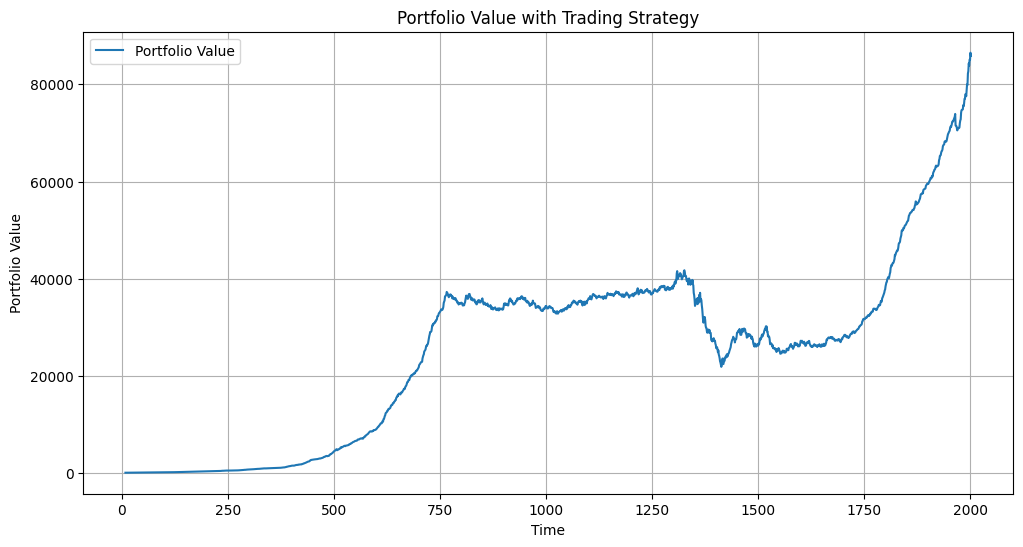

In [79]:
# Start from $100, if A2_lag1 is positive, buy A3, if A2_lag1 is negative, sell A3
cash = 100
portfolio_value = [cash]

for i in range(len(df)):
    A2_lag1 = df['A2_lag1'].iloc[i]
    A3 = df['A3'].iloc[i]

    if A2_lag1 > 0:  # Buy A3
        portfolio_value.append(portfolio_value[-1] * (1 + A3))
    elif A2_lag1 < 0:  # Sell A3
        portfolio_value.append(portfolio_value[-1] * (1 - A3))

portfolio_value = portfolio_value[1:]  # Remove the initial cash value

# Calculate total return
total_return = (portfolio_value[-1] / 100) - 1

print("Total Return of Trading Strategy:", total_return)

# plot returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, portfolio_value, label="Portfolio Value")
plt.title("Portfolio Value with Trading Strategy")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()

